In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("failure_all.csv")

TP = 0
FP = 0
TN = 0
FN = 0


for i in range(df.shape[0]):
    
    if df["and predict failure"][i] == 1 and df["and predict failure"][i]==df["ground true"][i]:
        TP+=1
    
for i in range(df.shape[0]):
    if df["and predict failure"][i] == 0 and df["and predict failure"][i]!=df["ground true"][i]:
        FP+=1
        
for i in range(df.shape[0]):
    if df["and predict failure"][i] == 0 and df["and predict failure"][i]==df["ground true"][i]:
        TN+=1
        
for i in range(df.shape[0]):
    if df["and predict failure"][i] == 1 and df["and predict failure"][i]!=df["ground true"][i]:
        FN+=1
        
print(TP)
print(FP)
print(TN)
print(FN)
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision= TP/(TP+FP)
Recall   = TP/(TP+FN)
F1 = 2 / ( (1/ Precision) + (1/ Recall) )

print(F1)
print("Accuracy: {}%".format(round(Accuracy,4)*100))
print("Precision: {}%".format(round(Precision,4)*100))
print("Recall: {}%".format(round(Recall,4)*100))
print("F1: {}%".format(round(F1,3)*100))

13
110
5268
57
0.13471502590673576
Accuracy: 96.93%
Precision: 10.57%
Recall: 18.57%
F1: 13.5%


In [4]:
#df["C_anomaly_label"] = df["Disk (0 C:) - Current Disk Queue Length"].apply(lambda x: 1 if x > 3 else 0)

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("failure_all.csv")


TP = 0
FP = 0
TN = 0
FN = 0

gt_col="ground true"
pre_col="or predict failure"


for i in range(df.shape[0]):
    
    if df[pre_col][i] == 1 and df[pre_col][i]==df[gt_col][i]:
        TP+=1
    
for i in range(df.shape[0]):
    if df[pre_col][i] == 0 and df[pre_col][i]!=df[gt_col][i]:
        FP+=1
        
for i in range(df.shape[0]):
    if df[pre_col][i] == 0 and df[pre_col][i]==df[gt_col][i]:
        TN+=1
        
for i in range(df.shape[0]):
    if df[pre_col][i] == 1 and df[pre_col][i]!=df[gt_col][i]:
        FN+=1
        
print(TP)
print(FP)
print(TN)
print(FN)
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision= TP/(TP+FP)
Recall   = TP/(TP+FN)
F1 = 2 / ( (1/ Precision) + (1/ Recall) )

print(F1)
print("Accuracy: {}%".format(round(Accuracy,4)*100))
print("Precision: {}%".format(round(Precision,4)*100))
print("Recall: {}%".format(round(Recall,4)*100))
print("F1: {}%".format(round(F1,3)*100))

19
104
5252
73
0.17674418604651165
Accuracy: 96.75%
Precision: 15.45%
Recall: 20.65%
F1: 17.7%


In [12]:

df

,Unnamed: 0,Unnamed: 0.1,and predict failure,or predict failure,ground true,mae,rmse,30k and predict failure,40k and predict failure,50k and predict failure,60k and predict failure,70k and predict failure,80k and predict failure,90k and predict failure
0,0,0,0,0,0,18443,56224,1,1,1,0,0,0,0
1,1,1,0,0,0,18490,56457,1,1,1,0,0,0,0
2,2,2,0,0,0,18595,56638,1,1,1,0,0,0,0
3,3,3,0,0,0,18407,56603,1,1,1,0,0,0,0
4,4,4,0,0,0,17873,55125,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,5443,5443,0,0,0,17875,52777,1,1,1,0,0,0,0
5444,5444,5444,0,0,0,17963,53088,1,1,1,0,0,0,0
5445,5445,5445,0,0,0,17843,52954,1,1,1,0,0,0,0
5446,5446,5446,0,0,0,17639,52456,1,1,1,0,0,0,0


In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("failure_all.csv")
mae_th=25000
rmse_th=70000

for th in range(30000,100000,10000):
    new_col="{}k and predict failure".format(int(th/1000))

    df[new_col] = df["rmse"].apply(lambda x:1 if x >= th else 0)

gt_col="ground true"
pre_col="or predict failure"

    
def cal_metric(gt_col,pre_col):
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    print(pre_col)

    for i in range(df.shape[0]):

        if df[pre_col][i] == 1 and df[gt_col][i]==1:
            TP+=1

    for i in range(df.shape[0]):
        if df[pre_col][i] == 0 and df[gt_col][i]==1:
            FP+=1

    for i in range(df.shape[0]):
        if df[pre_col][i] == 0 and df[gt_col][i]==0:
            TN+=1

    for i in range(df.shape[0]):
        if df[pre_col][i] == 1 and df[gt_col][i]==0:
            FN+=1
    
    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    Precision= TP/(TP+FP)
    Recall   = TP/(TP+FN)
    F1 = 2 / ( (1/ Precision) + (1/ Recall) )
    
    
    print("Accuracy: {}%".format(round(Accuracy,4)*100))
    print("Precision: {}%".format(round(Precision,4)*100))
    print("Recall: {}%".format(round(Recall,4)*100))
    print("F1: {}%".format(round(F1,3)*100))
    print("\n")
    return TP,FP,TN,FN,Accuracy,Precision,Recall,F1
        

res_list = []
for pre_col in df.columns[-7:]:
    [TP,FP,TN,FN,Accuracy,Precision,Recall,F1] = cal_metric(gt_col,pre_col)
    res_list.append([Precision,Recall])




30k and predict failure
Accuracy: 91.02%
Precision: 19.509999999999998%
Recall: 5.800000000000001%
F1: 8.9%


40k and predict failure
Accuracy: 91.56%
Precision: 19.509999999999998%
Recall: 6.23%
F1: 9.4%


50k and predict failure
Accuracy: 93.30000000000001%
Precision: 17.89%
Recall: 7.6899999999999995%
F1: 10.8%


60k and predict failure
Accuracy: 96.75%
Precision: 15.45%
Recall: 20.65%
F1: 17.7%


70k and predict failure
Accuracy: 97.54%
Precision: 12.2%
Recall: 36.59%
F1: 18.3%


80k and predict failure
Accuracy: 97.92999999999999%
Precision: 8.94%
Recall: 91.67%
F1: 16.3%


90k and predict failure
Accuracy: 97.83%
Precision: 4.07%
Recall: 100.0%
F1: 7.8%




In [7]:
import matplotlib.pyplot as plt

plt.plot(res[:,1],res[:,0])

NameError: name 'res' is not defined

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("test_res.csv")

TP = 0
FP = 0
TN = 0
FN = 0


for i in range(df.shape[0]):
    
    if df["predict"][i] == 1 and df["predict"][i]==df["ground true"][i]:
        TP+=1
    
for i in range(df.shape[0]):
    if df["predict"][i] == 0 and df["predict"][i]!=df["ground true"][i]:
        FP+=1
        
for i in range(df.shape[0]):
    if df["predict"][i] == 0 and df["predict"][i]==df["ground true"][i]:
        TN+=1
        
for i in range(df.shape[0]):
    if df["predict"][i] == 1 and df["predict"][i]!=df["ground true"][i]:
        FN+=1
        
print("TP:",TP)
print("FP:",FP)
print("TN:",TN)
print("FN:",FN)
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision= TP/(TP+FP)
Recall   = TP/(TP+FN)
F1 = 2 / ( (1/ Precision) + (1/ Recall) )


print("\nAccuracy: {}%".format(round(Accuracy,4)*100))
print("Precision: {}%".format(round(Precision,4)*100))
print("Recall: {}%".format(round(Recall,4)*100))
print("F1: {}%".format(round(F1,3)*100))

TP: 2
FP: 2
TN: 11
FN: 0

Accuracy: 86.67%
Precision: 50.0%
Recall: 100.0%
F1: 66.7%


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("./1110101_TCNAE_result./test_res.csv")

TP = 0
FP = 0
TN = 0
FN = 0


for i in range(df.shape[0]):
    
    if df["predict"][i] == 1 and df["predict"][i]==df["ground true"][i]:
        TP+=1
    
for i in range(df.shape[0]):
    if df["predict"][i] == 0 and df["predict"][i]!=df["ground true"][i]:
        FP+=1
        
for i in range(df.shape[0]):
    if df["predict"][i] == 0 and df["predict"][i]==df["ground true"][i]:
        TN+=1
        
for i in range(df.shape[0]):
    if df["predict"][i] == 1 and df["predict"][i]!=df["ground true"][i]:
        FN+=1
        
print("TP:",TP)
print("FP:",FP)
print("TN:",TN)
print("FN:",FN)
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision= TP/(TP+FP)
Recall   = TP/(TP+FN)
F1 = 2 / ( (1/ Precision) + (1/ Recall) )


print("\nAccuracy: {}%".format(round(Accuracy,4)*100))
print("Precision: {}%".format(round(Precision,4)*100))
print("Recall: {}%".format(round(Recall,4)*100))
print("F1: {}%".format(round(F1,3)*100))

TP: 2
FP: 2
TN: 11
FN: 0

Accuracy: 86.67%
Precision: 50.0%
Recall: 100.0%
F1: 66.7%


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("./1110101_TCNAE_result./test_res.csv")

TP = 0
FP = 0
TN = 0
FN = 0

for record in df 
for i in range(df.shape[0]):
    
    if df["predict"][i] == 1 and df["predict"][i]==df["ground true"][i]:
        TP+=1
    
for i in range(df.shape[0]):
    if df["predict"][i] == 0 and df["predict"][i]!=df["ground true"][i]:
        FP+=1
        
for i in range(df.shape[0]):
    if df["predict"][i] == 0 and df["predict"][i]==df["ground true"][i]:
        TN+=1
        
for i in range(df.shape[0]):
    if df["predict"][i] == 1 and df["predict"][i]!=df["ground true"][i]:
        FN+=1
        
print("TP:",TP)
print("FP:",FP)
print("TN:",TN)
print("FN:",FN)
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision= TP/(TP+FP)
Recall   = TP/(TP+FN)
F1 = 2 / ( (1/ Precision) + (1/ Recall) )


print("\nAccuracy: {}%".format(round(Accuracy,4)*100))
print("Precision: {}%".format(round(Precision,4)*100))
print("Recall: {}%".format(round(Recall,4)*100))
print("F1: {}%".format(round(F1,3)*100))

TP: 0
FP: 0
TN: 1
FN: 0

Accuracy: 100.0%
Precision: 0%
Recall: 0%
F1: 66.7%
TP: 0
FP: 0
TN: 2
FN: 0

Accuracy: 100.0%
Precision: 0%
Recall: 0%
F1: 66.7%
TP: 1
FP: 0
TN: 2
FN: 0

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 0
TN: 3
FN: 0

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 0
TN: 4
FN: 0

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 0
TN: 5
FN: 0

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 0
TN: 6
FN: 0

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 0
TN: 7
FN: 0

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 1
TN: 7
FN: 0

Accuracy: 88.89%
Precision: 50.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 1
TN: 8
FN: 0

Accuracy: 90.0%
Precision: 50.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 1
TN: 9
FN: 0

Accuracy: 90.91%
Precision: 50.0%
Recall: 100.0%
F1: 66.7%
TP: 1
FP: 1
TN: 10
FN: 0

Accuracy: 91.67%
Precision: 50.0%
Recall: 100.0%
F1: 66.7%


Text(0, 0.5, 'Precision')

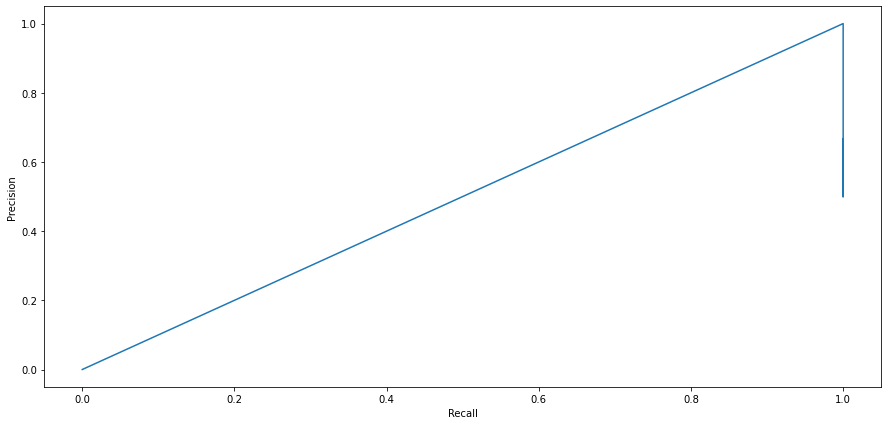

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(15, 7) 

df = pd.read_csv("./1110101_TCNAE_result./test_res.csv")

TP = 0
FP = 0
TN = 0
FN = 0
metric_list = []
for i in range(df.shape[0]):
    temp = df.iloc[i,:]
    
    
    if df["predict"][i] == 1 and df["predict"][i]==df["ground true"][i]:
        TP+=1
    
    
    if df["predict"][i] == 0 and df["predict"][i]!=df["ground true"][i]:
        FP+=1

   
    if df["predict"][i] == 0 and df["predict"][i]==df["ground true"][i]:
        TN+=1

    
    if df["predict"][i] == 1 and df["predict"][i]!=df["ground true"][i]:
        FN+=1
        
    print("TP:",TP)
    print("FP:",FP)
    print("TN:",TN)
    print("FN:",FN)
    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    if (TP+FP) == 0:
        Precision= 0
    else:
        Precision= TP/(TP+FP)
        
    if (TP+FN) == 0:
        Recall= 0
    else:
        Recall   = TP/(TP+FN)
    #Recall   = TP/(TP+FN)
    metric_list.append([Precision,Recall])
    #F1 = 2 / ( (1/ Precision) + (1/ Recall) )


    print("\nAccuracy: {}%".format(round(Accuracy,4)*100))
    print("Precision: {}%".format(round(Precision,4)*100))
    print("Recall: {}%".format(round(Recall,4)*100))
    print("F1: {}%".format(round(F1,3)*100))

res = np.array(metric_list)    
    
plt.plot(res[:,1],res[:,0])
plt.xlabel("Recall")
plt.ylabel("Precision")

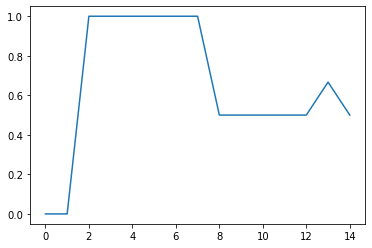

In [21]:
plt.plot(res[:,0])
plt.plot(res[:,1])

In [25]:
from numpy import trapz
trapz(res[:,1], res[:,0], dx=0.001)

0.0